# Expresiones temporales en 4 tipos de textos distintos

Christian Ríos y Lino Urdaneta

## Procesamiento básico

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import os, nltk
import xml.etree.ElementTree as etree
import pandas as pd

In [2]:
def time_type(archivo):
    archivo_xml = etree.parse(archivo)
    raiz_xml = archivo_xml.getroot()
    lista_tipo = []
    for i in raiz_xml[1]:
        nodo = i.attrib
        tipo = nodo.get('type') # si se cambia esto se pueden buscar otros atributos
        lista_tipo.append(tipo)
    return lista_tipo

In [3]:
# Nota: No debe haber archivos ocultos en estos directorios.

# Crea una lista de archivos XML
lista_archivos = [(x, i) for x, y, z in os.walk('/Users/lino/Dropbox/Cosas de Christian-kun/Textos') for i in z if i.endswith('xml')] 

In [4]:
lista_tiempo = [(directorio[0][directorio[0].rfind('/')+1:], archivo) for directorio in lista_archivos 
                for archivo in time_type(directorio[0] + '/' + directorio[1])]

Convertir a un objeto de Pandas:

In [5]:
d = [{'texto':a, 'time_type':b} for a, b in lista_tiempo]
data = pd.DataFrame(d)

In [6]:
data.head()

,texto,time_type
0,astronomia,DATE
1,astronomia,DATE
2,astronomia,DATE
3,astronomia,DATE
4,astronomia,DATE


In [7]:
data.groupby('texto').describe()

time_type                  
                      count unique   top freq
texto                                        
astronomia              211      3  DATE  166
astronomy               305      3  DATE  212
eventosHistoricos       459      4  DATE  396
historicalevents       1038      4  DATE  839
news                     68      4  DATE   50
noticias                 61      3  DATE   46
zoologia                234      3  DATE  126
zoology                 520      4  DATE  361

### Resumen

In [8]:
dfc = nltk.ConditionalFreqDist(lista_tiempo)
dfc.tabulate()

                      DATE DURATION      SET     TIME 
       astronomia      166       44        1        0 
        astronomy      212       87        6        0 
eventosHistoricos      396       54        1        8 
 historicalevents      839      177        4       18 
             news       50       13        1        4 
         noticias       46       11        0        4 
         zoologia      126      105        3        0 
          zoology      361      149        8        2 


## Cálculo ANOVA

## Datos generales

In [9]:
datos = [(texto[0][texto[0].rfind('/')+1:], texto[1][:-8], cantidad) for texto in lista_archivos for cantidad in time_type(texto[0] + '/' + texto[1])]
casos = [w for w in datos]
set_casos = set(casos)

In [10]:
d = [{'grupo': w[0], 'texto': w[1], 'cantidad': casos.count(w)} for w in set_casos]
general_data = pd.DataFrame(d)

In [11]:
general_data.head()

,cantidad,grupo,texto
0,45,eventosHistoricos,batallaBerlinEspaciado
1,23,astronomy,bigbang.t
2,14,astronomia,sistemaSolarEspaciado
3,8,noticias,iranEspaciado
4,12,noticias,coincheckEspaciado


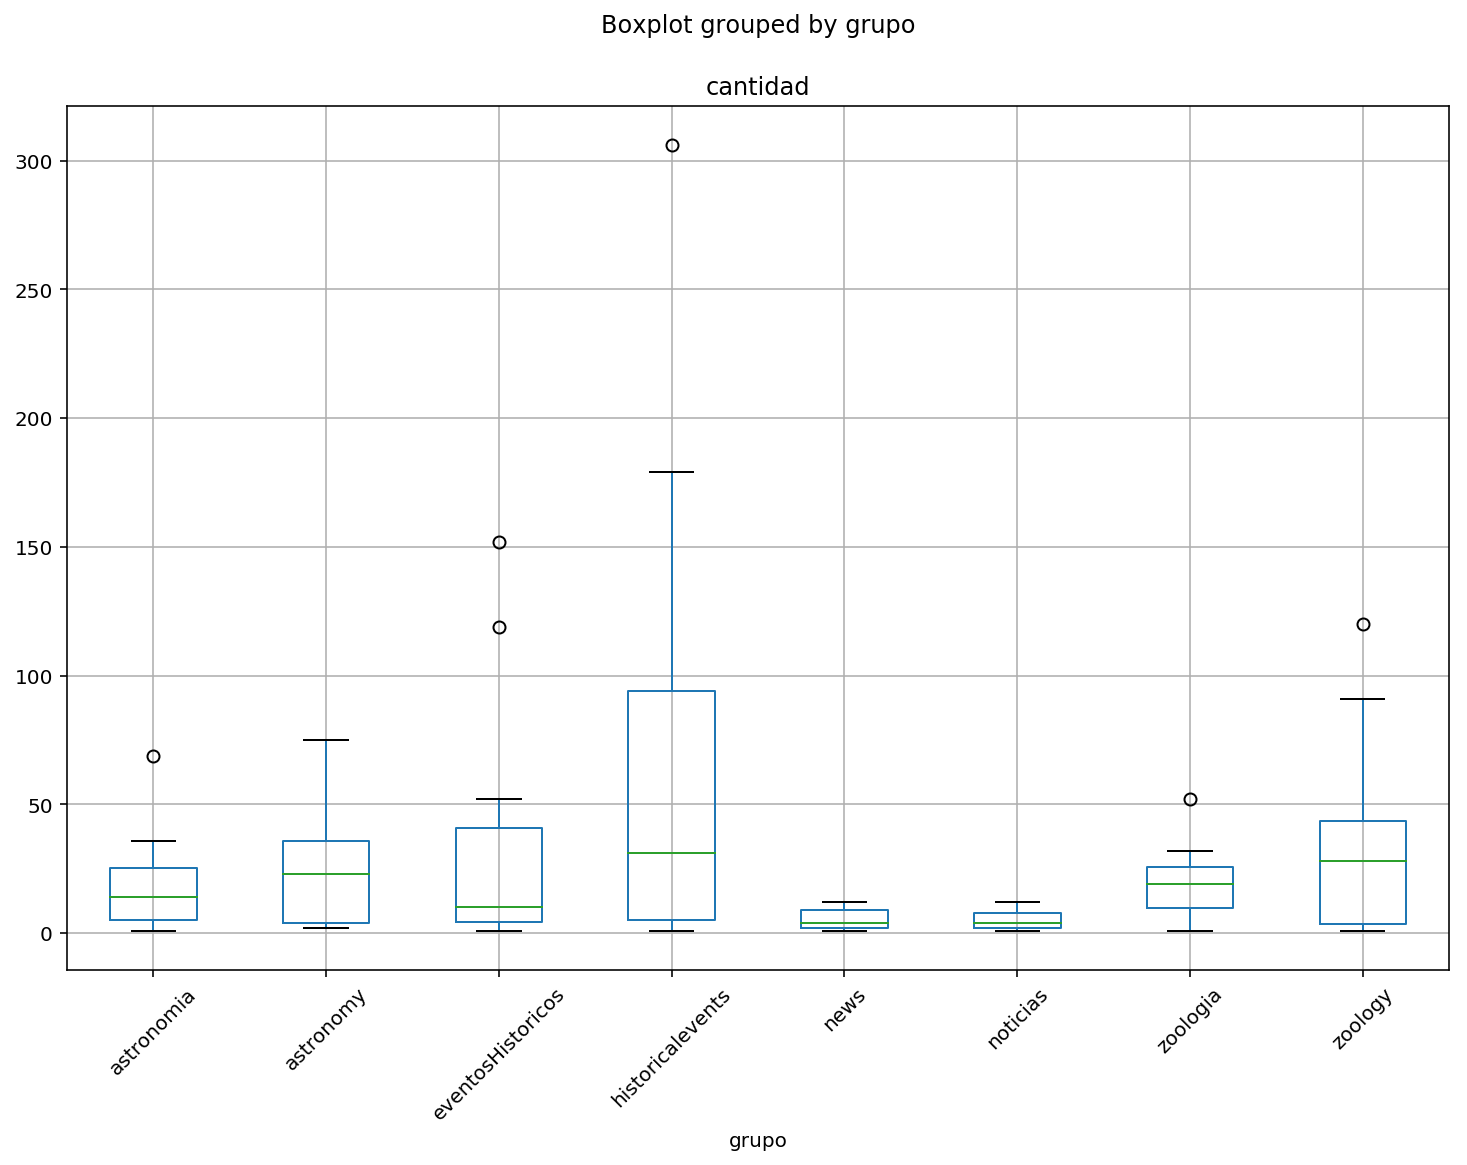

In [12]:
# Visualizar datos como boxplots
general_data.boxplot('cantidad', by='grupo', figsize=(12,8), rot=45)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x110a059e8>]],
      dtype=object)

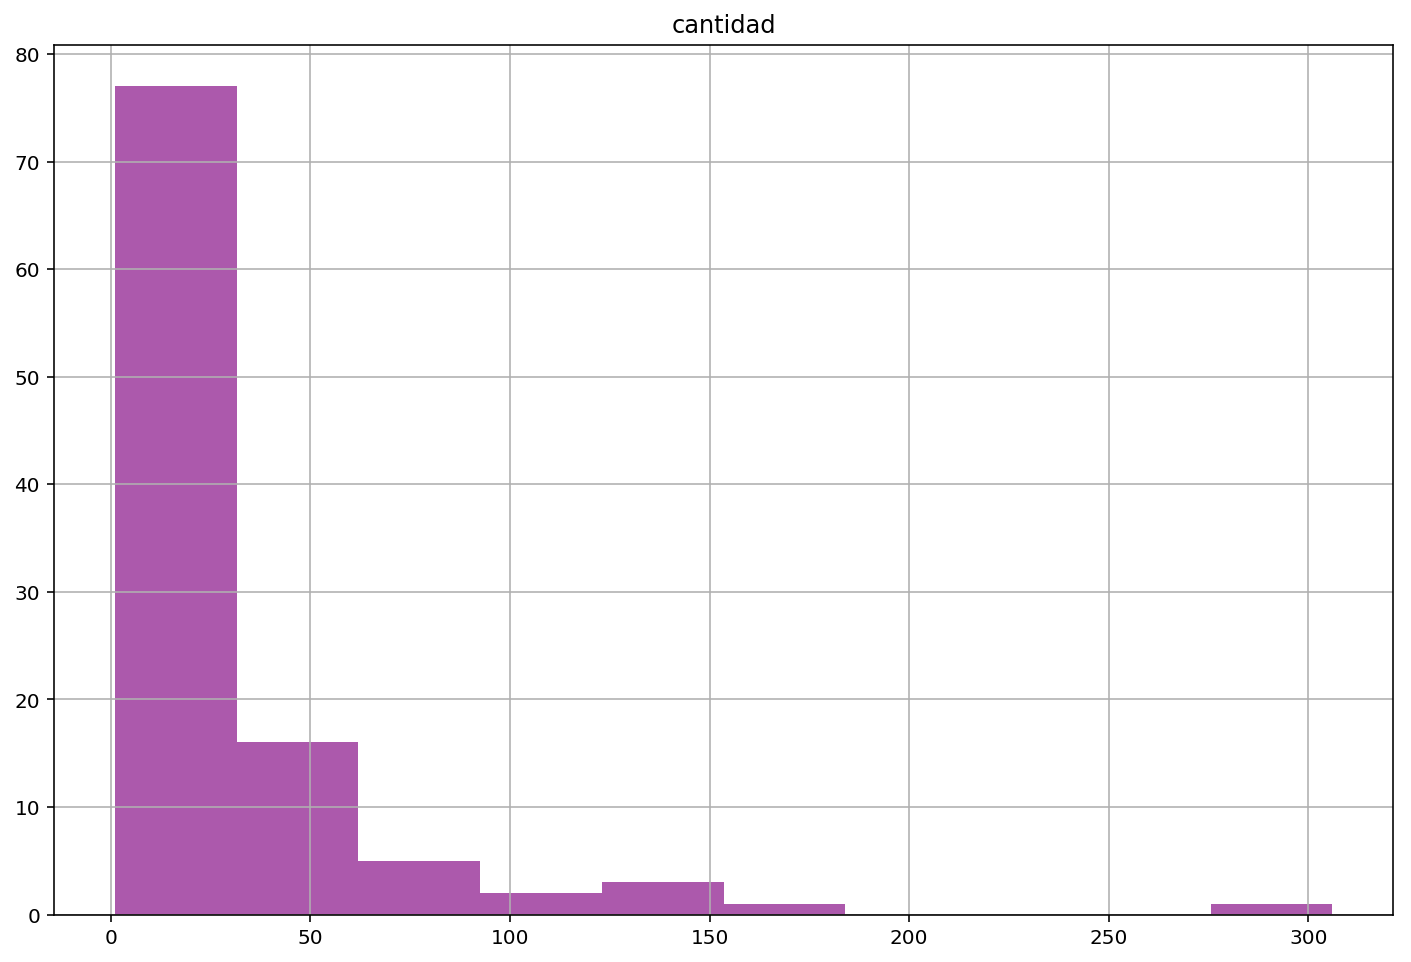

In [13]:
# Visualizar datos como un solo histograma
general_data.hist('cantidad', bins=10, figsize=(12,8), color='purple', alpha=0.65)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1d9e1748>,
      dtype=object)

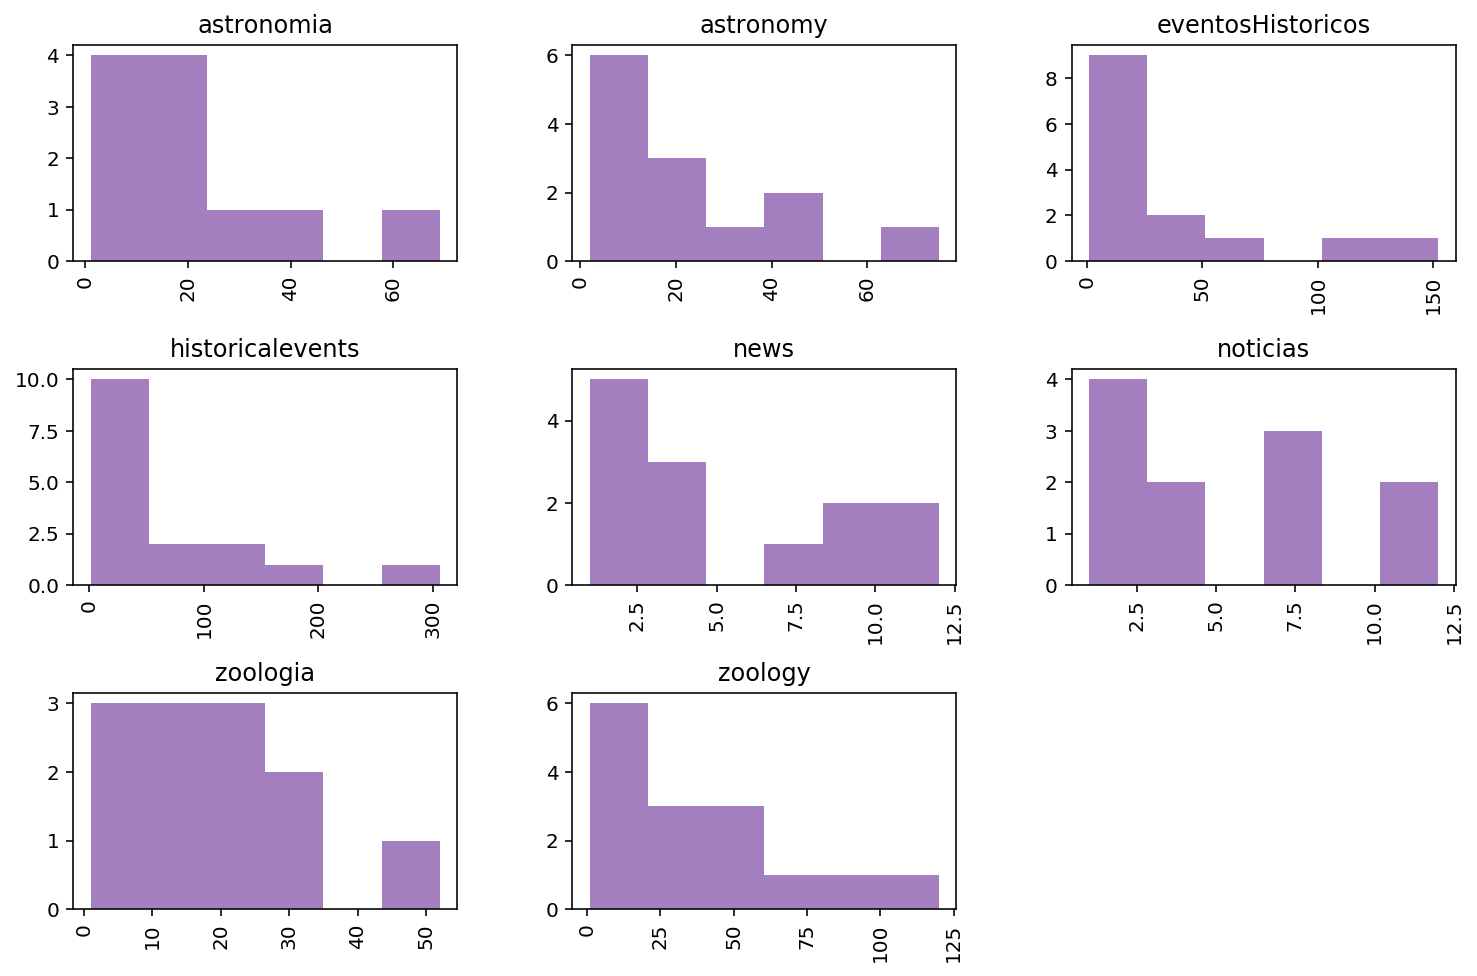

In [14]:
# Visualizar datos como varios histogramas por grupo
general_data.hist('cantidad', bins=6, figsize=(12,8), color='indigo', alpha=0.50, by='grupo')

### Diferencias de un tipo de expresión temporal por tipos de texto

Se señala qué **tipo de expresión temporal** se va a analizar:

In [15]:
datos_texto = [(texto[0][texto[0].rfind('/')+1:], texto[1][:-8], cantidad) for texto in lista_archivos for cantidad in time_type(texto[0] + '/' + texto[1])]
casos = [w for w in datos_texto if w[2] == 'TIME'] # DATE se puede cambiar para buscar 
# otra etiqueta
set_casos = set(casos)

In [16]:
d = [{'grupo': w[0], 'texto': w[1], 'cantidad': casos.count(w)} for w in set_casos]
time_data = pd.DataFrame(d)

Datos filtrados por la expresión temporal escogida:

In [17]:
time_data.head()

,cantidad,grupo,texto
0,3,news,coinCheck
1,5,eventosHistoricos,batallaBerlinEspaciado
2,1,zoology,tiger
3,1,zoology,giantPanda
4,1,eventosHistoricos,stalingradoEspaciado


Visualizar datos por tipos de texto:

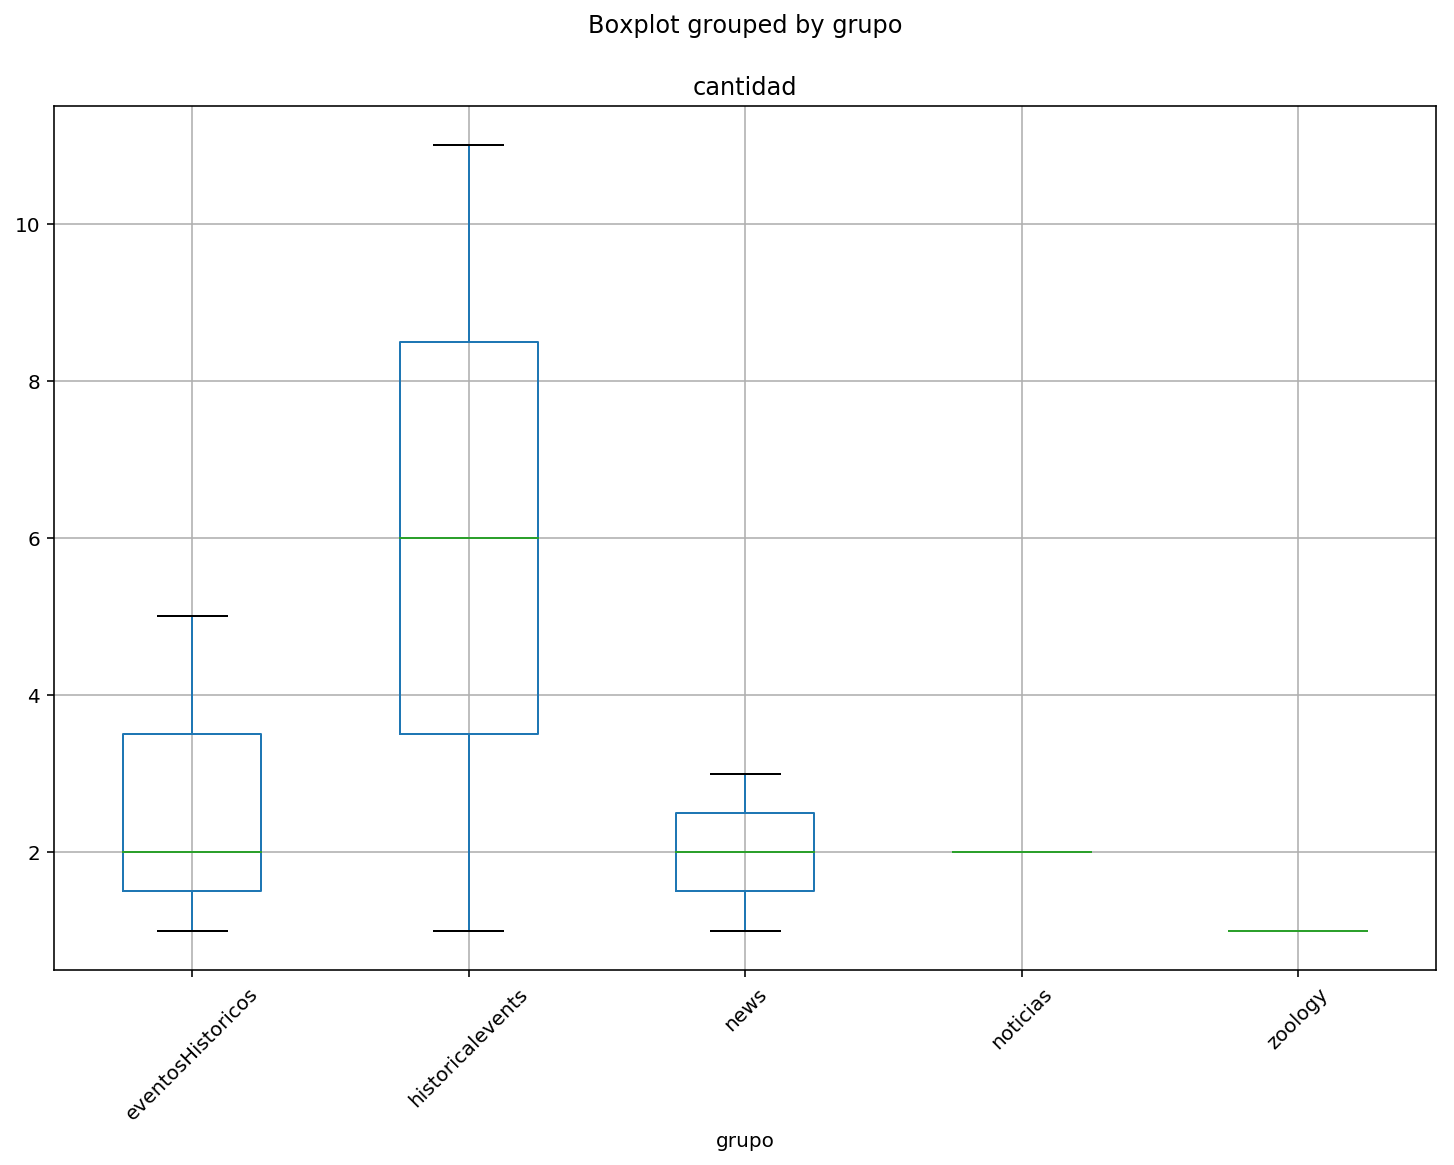

In [18]:
# Visualizar datos como boxplots
time_data.boxplot('cantidad', by='grupo', figsize=(12,8), rot=45)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1e8d02e8>]],
      dtype=object)

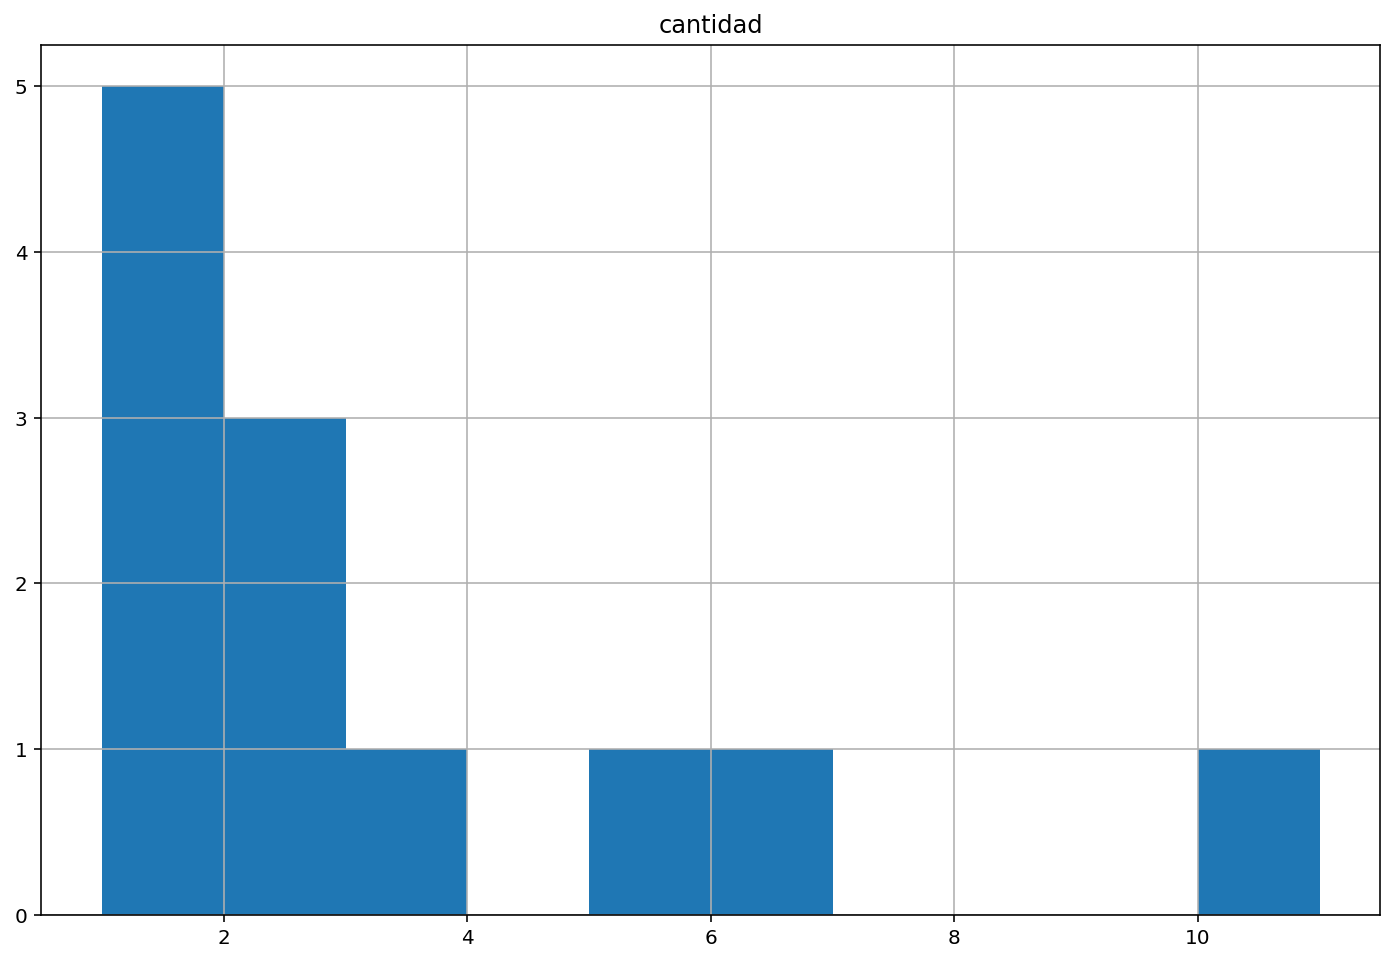

In [19]:
# Visualizar datos como histogram
time_data.hist('cantidad', bins=10, figsize=(12,8))

### Análisis estadístico de las diferencias entre los tipos de texto:

In [20]:
grupos = pd.unique(time_data.grupo.values)
d_time_data = {grp: time_data['cantidad'][time_data.grupo == grp] for grp in grupos}
k = len(pd.unique(time_data.grupo))
N = len(time_data.values)
n = time_data.groupby('grupo').size()[0]

In [21]:
# ANOVA one-way usando SciPy
from scipy import stats

f, p = stats.f_oneway(d_time_data['eventosHistoricos'], d_time_data['historicalevents'])

In [22]:
f, p, k, N, n

(1.1363636363636362, 0.34649037019369555, 5, 12, 3)

In [23]:
if p < 0.05:
    print('p es significativo.')
else:
    print('No es significativa la diferencia (p es mayor a 0,05).')

No es significativa la diferencia (p es mayor a 0,05).


### Diferencias en un texto con respecto al uso de diferentes tipos de expresión temporal

Se señala qué **tipo de texto** se va a analizar:

In [24]:
datos_texto = [(texto[0][texto[0].rfind('/')+1:], texto[1][:-8], cantidad) for texto in lista_archivos for cantidad in time_type(texto[0] + '/' + texto[1])]
casos = [w for w in datos_texto if w[0] == 'noticias'] # Esto último se 
# puede cambiar para procesar otro tipo de texto.
set_casos = set(casos)

In [25]:
d = [{'grupo': w[1], 'etiqueta': w[2], 'cantidad': casos.count(w)} for w in set_casos]
texto_data = pd.DataFrame(d)

Datos filtrados por el tipo de texto escogido:

In [26]:
texto_data

,cantidad,etiqueta,grupo
0,1,DURATION,olimpiadasEspaciado.t
1,11,DATE,olimpiadasInviernoEspaciado
2,4,DURATION,iranEspaciado
3,2,DURATION,coincheckEspaciado
4,2,TIME,coincheckEspaciado
5,8,DATE,iranEspaciado
6,2,TIME,afganistanEspaciado
7,8,DATE,olimpiadasEspaciado.t
8,4,DURATION,olimpiadasInviernoEspaciado
9,12,DATE,coincheckEspaciado


#### Media total de expresiones temporales en el *tipo texto*:

In [27]:
texto_data.mean()

cantidad    5.545455
dtype: float64

#### Mediana total de expresiones temporales en el *tipo de texto*:

In [28]:
# Mediana total:
texto_data.median()

cantidad    4.0
dtype: float64

#### Resumen del *tipo de texto*:

In [29]:
texto_data.groupby('etiqueta').describe()

cantidad                                            
            count  mean       std  min   25%  50%   75%   max
etiqueta                                                     
DATE          5.0  9.20  2.167948  7.0  8.00  8.0  11.0  12.0
DURATION      4.0  2.75  1.500000  1.0  1.75  3.0   4.0   4.0
TIME          2.0  2.00  0.000000  2.0  2.00  2.0   2.0   2.0

#### Visualizar datos por tipos de expresión temporal:

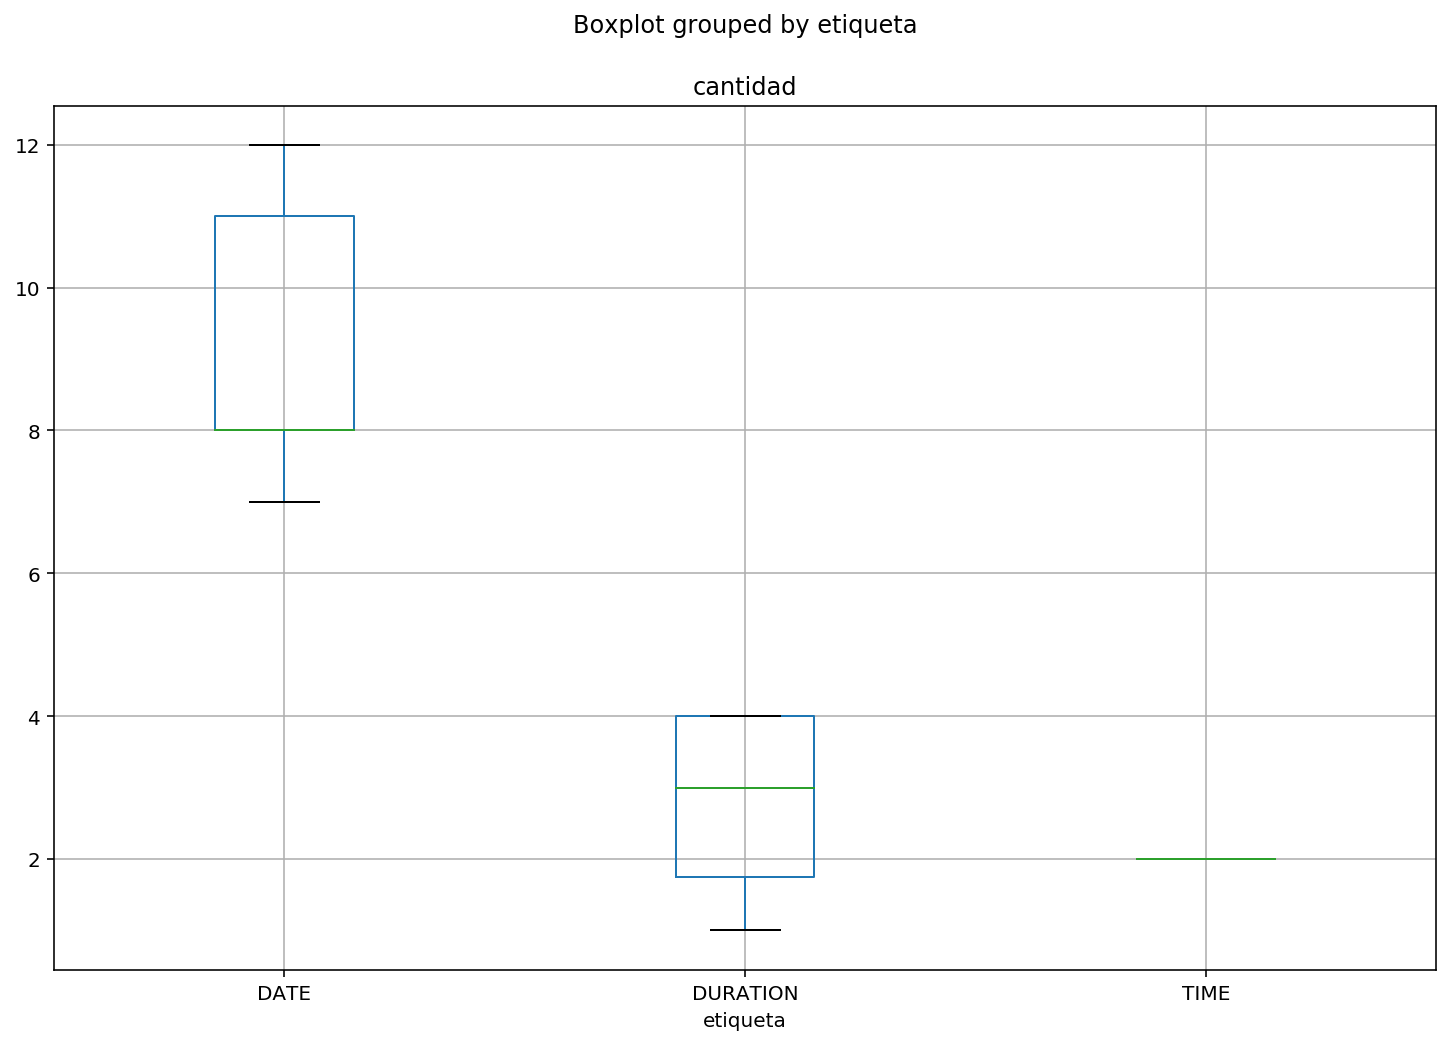

In [30]:
# Visualizar datos como boxplots
texto_data.boxplot('cantidad', by='etiqueta', figsize=(12,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1e82e2b0>]],
      dtype=object)

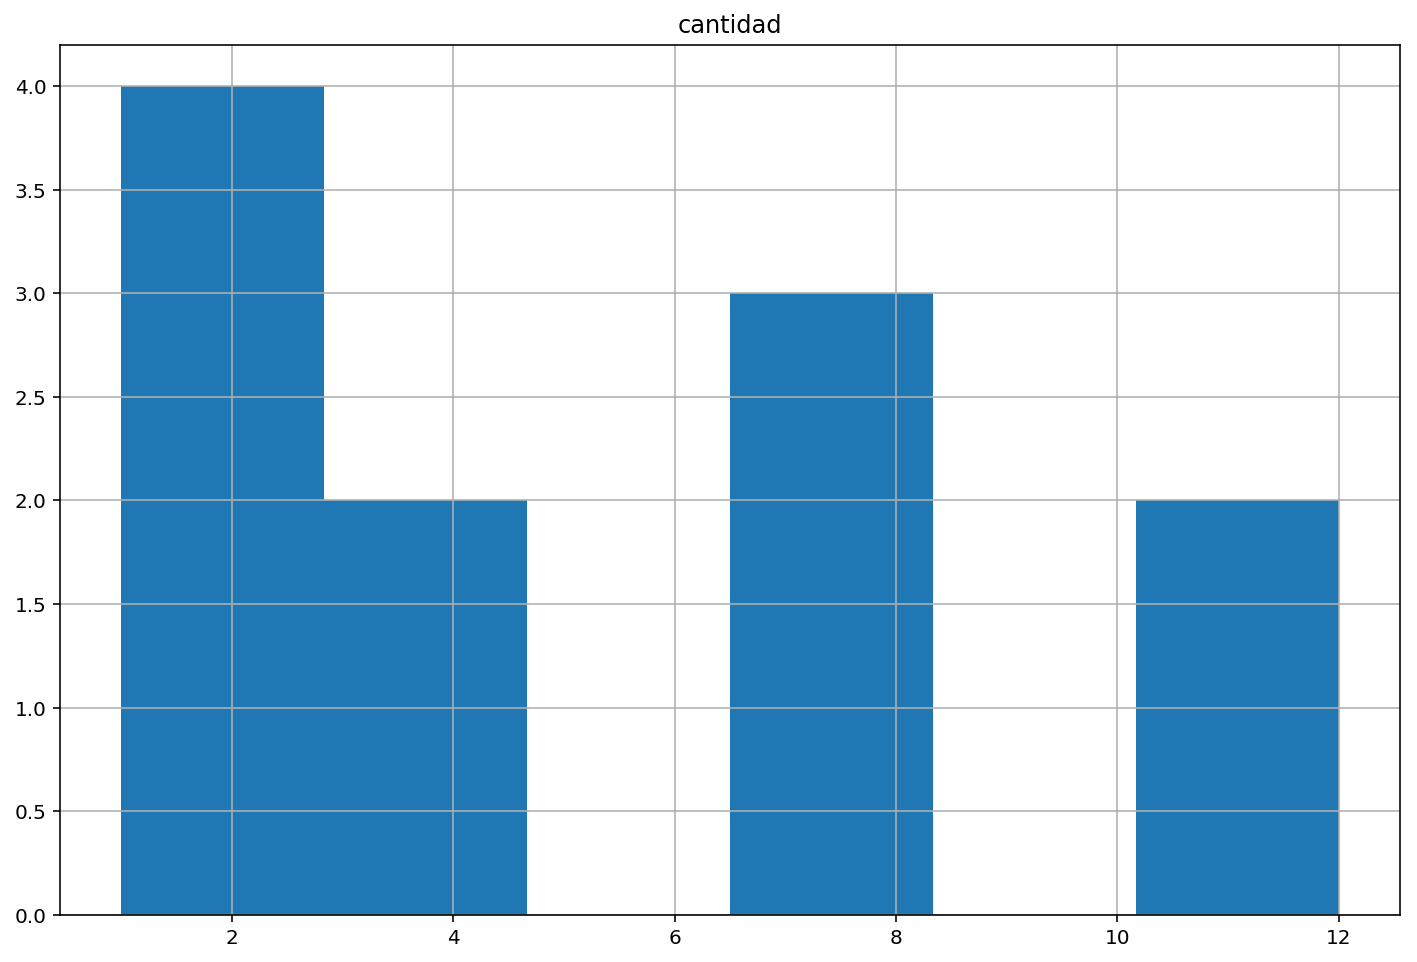

In [31]:
# Visualizar datos como histogram
texto_data.hist('cantidad', bins=6, figsize=(12,8))

### Análisis estadístico de las diferencias entre los tipos de expresión temporal:

In [32]:
grupos = pd.unique(texto_data.etiqueta.values)
d_texto_data = {grp: texto_data['cantidad'][texto_data.etiqueta == grp] for grp in grupos}
k = len(pd.unique(texto_data.etiqueta))
N = len(texto_data.values)
n = texto_data.groupby('etiqueta').size()[0]

In [33]:
# ANOVA one-way usando SciPy
from scipy import stats

f, p = stats.f_oneway(d_texto_data['DATE'], d_texto_data['DURATION'], d_texto_data['TIME'])

In [34]:
f, p

(19.28411314712686, 0.0008709659186574564)

In [35]:
if p < 0.05:
    print('p es significativo.')
else:
    print('No es significativa la diferencia (p es mayor a 0,05).')

p es significativo.


## Prueba *t*

Esto es solo un ejemplo. Hay que escoger bien lo que se va a comparar.

In [36]:
from scipy import stats
import numpy as np

In [37]:
datos_texto = [(texto[0][texto[0].rfind('/')+1:], texto[1][:-8], cantidad) for texto in lista_archivos for cantidad in time_type(texto[0] + '/' + texto[1])]
casos = [w for w in datos_texto if w[2] == 'DATE'] # DATE se puede cambiar para buscar 
# otra etiqueta
set_casos = set(casos)

In [38]:
d = [{'grupo': w[0], 'texto': w[1], 'cantidad': casos.count(w)} for w in set_casos]
time_data = pd.DataFrame(d)

In [39]:
time_data.tail()

,cantidad,grupo,texto
35,34,astronomia,bigbangEspaciado
36,8,news,afganistan.t
37,91,zoology,polarBear
38,9,news,iran.t
39,36,astronomia,hoyoNegroEspaciado


In [40]:
serie_historicalEvents = time_data[time_data['grupo'] == 'historicalevents'].cantidad

In [41]:
serie_zoology = time_data[time_data['grupo'] == 'eventosHistoricos'].cantidad

In [42]:
serie_zoology

0      28
3      45
17    152
19     52
22    119
Name: cantidad, dtype: int64

In [43]:
stats.ttest_ind(serie_historicalEvents, serie_zoology)

Ttest_indResult(statistic=1.979780758247612, pvalue=0.08307689976608093)

## Prueba chi cuadrado

In [44]:
from scipy import stats
import numpy as np
import xml.etree.ElementTree as etree
import pandas as pd

In [45]:
def time_type(archivo):
    archivo_xml = etree.parse(archivo)
    raiz_xml = archivo_xml.getroot()
    lista_tipo = []
    for i in raiz_xml[1]:
        nodo = i.attrib
        tipo = nodo.get('type') # si se cambia esto se pueden buscar otros atributos
        lista_tipo.append(tipo)
    return lista_tipo

In [46]:
# Nota: No debe haber archivos ocultos en estos directorios.

# Crea una lista de archivos XML
lista_archivos = [(x, i) for x, y, z in os.walk('/Users/lino/Dropbox/Cosas de Christian-kun/Textos') for i in z if i.endswith('xml')] 

In [47]:
lista_tiempo = [(directorio[0][directorio[0].rfind('/')+1:], archivo) for directorio in lista_archivos 
                for archivo in time_type(directorio[0] + '/' + directorio[1])]

In [48]:
d = [{'texto':a, 'time_type':b} for a, b in lista_tiempo]
data = pd.DataFrame(d)

In [49]:
data['time_type'].value_counts()

DATE        2196
DURATION     640
TIME          36
SET           24
Name: time_type, dtype: int64

In [50]:
data_agrupada = data.groupby(['texto', 'time_type']).agg({'time_type':"count"})
data_agrupada

time_type
texto             time_type           
astronomia        DATE             166
                  DURATION          44
                  SET                1
astronomy         DATE             212
                  DURATION          87
                  SET                6
eventosHistoricos DATE             396
                  DURATION          54
                  SET                1
                  TIME               8
historicalevents  DATE             839
                  DURATION         177
                  SET                4
                  TIME              18
news              DATE              50
                  DURATION          13
                  SET                1
                  TIME               4
noticias          DATE              46
                  DURATION          11
                  TIME               4
zoologia          DATE             126
                  DURATION         105
                  SET                3
zoology           DATE             361
                  DURATION         149
                  SET                8
                  TIME               2

In [51]:
observed_values = np.array([[166,44,1,0],[212,87,6,0],[396,54,1,8],[839,177,4,18],[50,13,1,4],[46,11,0,4],[126,105,3,0],[361,149,8,2]])

In [52]:
expected_values = np.array([[160,46.63,1.75,2.62],[231.28,67.4,2.53,3.79],[348.05,101.44,3.8,5.71],[787.1,229.39,8.6,12.9],[51.56,15.03,0.56,0.85],[46.26,13.48,0.51,0.76],[177.44,51.71,1.94,2.91],[394.31,114.92,4.31,6.46]])

In [53]:
stats.chisquare(observed_values, axis=None) # Aplica chi a toda la tabla.

Power_divergenceResult(statistic=9942.32044198895, pvalue=0.0)

In [54]:
stats.chi2_contingency(observed_values) # Este muestra chi cuadrado, p, grados de libertad, y valores esperados

(190.55510760043933,
 2.5860011386948674e-29,
 21,
 array([[1.59998619e+02, 4.66298343e+01, 1.74861878e+00, 2.62292818e+00],
        [2.31277624e+02, 6.74033149e+01, 2.52762431e+00, 3.79143646e+00],
        [3.48053867e+02, 1.01436464e+02, 3.80386740e+00, 5.70580110e+00],
        [7.87102210e+02, 2.29392265e+02, 8.60220994e+00, 1.29033149e+01],
        [5.15635359e+01, 1.50276243e+01, 5.63535912e-01, 8.45303867e-01],
        [4.62555249e+01, 1.34806630e+01, 5.05524862e-01, 7.58287293e-01],
        [1.77439227e+02, 5.17127072e+01, 1.93922652e+00, 2.90883978e+00],
        [3.94309392e+02, 1.14917127e+02, 4.30939227e+00, 6.46408840e+00]]))

### Nota:
Se espera que en chi cuadrado, los valores esperados sean siempre mayores a 5. En este caso, hay varios que dan valores menores. Intenté "colapsar" las dos últimas columnas, pero sigue habiendo valores esperados menores a cinco. La recomendación para otros trabajos sería recoger un corpus más grande o equilibrado.

## Casos de expresiones temporales

Lo siguiente permite observar los casos individuales de las expresiones temporales, en lugar de contarlas. Puede usarse para extraer ejemplos o realizar un análisis cualitativo de estas expresiones. También se pueden exportar como un CSV.

In [55]:
def time_expression(archivo):
     archivo_xml = etree.parse(archivo)
     raiz_xml = archivo_xml.getroot()
     lista_tipo = []
     for i in raiz_xml[1]:
         nodo = i.attrib
         tipo = nodo.get('type') # si se cambia esto se pueden buscar otros atributos
         texto = nodo.get('text')  # si se cambia esto se pueden buscar otros atributos
         lista_tipo.append([tipo, texto])
     return lista_tipo

In [56]:
lista_expresiones = [(directorio[0][directorio[0].rfind('/')+1:], archivo) for directorio in lista_archivos 
                for archivo in time_expression(directorio[0] + '/' + directorio[1])]

In [57]:
d = [{'texto': a, 'time_type': b[0], 'time_expression': b[1]} for a, b in lista_expresiones]
data_expresiones = pd.DataFrame(d)

In [58]:
data_expresiones.head()

,texto,time_expression,time_type
0,astronomia,1609 年,DATE
1,astronomia,1755 年,DATE
2,astronomia,1958 年,DATE
3,astronomia,1980 年代,DATE
4,astronomia,2005 年,DATE


In [59]:
data_expresiones[data_expresiones['texto'] == 'astronomy'].head()

,texto,time_expression,time_type
670,astronomy,1610,DATE
671,astronomy,the early 1920s,DATE
672,astronomy,1920,DATE
673,astronomy,2009,DATE
674,astronomy,"November 4, 2013",DATE


In [60]:
lista_ingles = ['astronomy', 'news', 'historicalevents', 'zoology']
data_ingles = data_expresiones.loc[data_expresiones['texto'].isin(lista_ingles)]

In [65]:
data_ingles.head()

,texto,time_expression,time_type
670,astronomy,1610,DATE
671,astronomy,the early 1920s,DATE
672,astronomy,1920,DATE
673,astronomy,2009,DATE
674,astronomy,"November 4, 2013",DATE


In [62]:
lista_japones = ['astronomia', 'noticias', 'eventosHistoricos', 'zoologia']
data_japones = data_expresiones.loc[data_expresiones['texto'].isin(lista_ingles)]

In [66]:
data_japones.head()

,texto,time_expression,time_type
670,astronomy,1610,DATE
671,astronomy,the early 1920s,DATE
672,astronomy,1920,DATE
673,astronomy,2009,DATE
674,astronomy,"November 4, 2013",DATE


### Exportar a un CSV:

In [64]:
#data_ingles.to_csv('/Users/lino/Dropbox/Cosas de Christian-kun/Textos/expresiones_temporales_ingles.csv', sep=',')